In [22]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [103]:
import warnings

import re
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
from plotly.subplots import make_subplots
theme_colors = ['#901272', '#94A832', '#6C7CD3', '#F16262', '#4C5760']
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

In [104]:
df = pd.read_csv(r"C:\Users\User\Desktop\Bootfile\Levels_Salary_Dataset.csv")
df.head()

timestamp    company level                         title  \
0   6/7/2017 11:33:27     Oracle    L3               Product Manager   
1  6/10/2017 17:11:29       eBay  SE 2             Software Engineer   
2  6/11/2017 14:53:57     Amazon    L7               Product Manager   
3   6/17/2017 0:23:14      Apple    M1  Software Engineering Manager   
4  6/20/2017 10:58:51  Microsoft    60             Software Engineer   

   totalyearlycompensation           location  yearsofexperience  \
0                   127000   Redwood City, CA                1.5   
1                   100000  San Francisco, CA                5.0   
2                   310000        Seattle, WA                8.0   
3                   372000      Sunnyvale, CA                7.0   
4                   157000  Mountain View, CA                5.0   

   yearsatcompany  tag  basesalary  ...  Doctorate_Degree  Highschool  \
0             1.5  NaN    107000.0  ...                 0           0   
1             3.0  NaN         0.0  ...                 0           0   
2             0.0  NaN    155000.0  ...                 0           0   
3             5.0  NaN    157000.0  ...                 0           0   
4             3.0  NaN         0.0  ...                 0           0   

  Some_College Race_Asian  Race_White  Race_Two_Or_More  Race_Black  \
0            0          0           0                 0           0   
1            0          0           0                 0           0   
2            0          0           0                 0           0   
3            0          0           0                 0           0   
4            0          0           0                 0           0   

   Race_Hispanic  Race  Education  
0              0   NaN        NaN  
1              0   NaN        NaN  
2              0   NaN        NaN  
3              0   NaN        NaN  
4              0   NaN        NaN  

[5 rows x 29 columns]

In [105]:
df1 = pd.read_csv(r"C:\Users\User\Desktop\Bootfile\statelatlong.csv")
df1.head()

State   Latitude   Longitude        City
0    AL  32.601011  -86.680736     Alabama
1    AK  61.302501 -158.775020      Alaska
2    AZ  34.168219 -111.930907     Arizona
3    AR  34.751928  -92.131378    Arkansas
4    CA  37.271875 -119.270415  California

In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      51 non-null     object 
 1   Latitude   51 non-null     float64
 2   Longitude  51 non-null     float64
 3   City       51 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.7+ KB


In [107]:
df1[["Latitude", "Longitude"]].head()

Latitude   Longitude
0  32.601011  -86.680736
1  61.302501 -158.775020
2  34.168219 -111.930907
3  34.751928  -92.131378
4  37.271875 -119.270415

In [108]:
df2 = df1[["Latitude", "Longitude"]]
df2.head()

Latitude   Longitude
0  32.601011  -86.680736
1  61.302501 -158.775020
2  34.168219 -111.930907
3  34.751928  -92.131378
4  37.271875 -119.270415

In [109]:
df["location"]

0         Redwood City, CA
1        San Francisco, CA
2              Seattle, WA
3            Sunnyvale, CA
4        Mountain View, CA
               ...        
62637          Seattle, WA
62638          Redmond, WA
62639          Seattle, WA
62640    San Francisco, CA
62641        Sunnyvale, CA
Name: location, Length: 62642, dtype: object

In [110]:
print(df.shape)

(62642, 29)


In [111]:
df.dtypes

timestamp                   object
company                     object
level                       object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
gender                      object
otherdetails                object
cityid                       int64
dmaid                      float64
rowNumber                    int64
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race_Asian                   int64
Race_White                   int64
Race_Two_Or_More             int64
Race_Black                   int64
Race_Hispanic                int64
Race                        object
Education           

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [113]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

In [114]:
nans =  pd.Series(df.isna().sum())
print("nans shape:", nans.shape)
nans.head(10)

nans shape: (29,)


timestamp                    0
company                      5
level                      119
title                        0
totalyearlycompensation      0
location                     0
yearsofexperience            0
yearsatcompany               0
tag                        854
basesalary                   0
dtype: int64

In [115]:
df.dropna(inplace=True)

In [116]:
df3 = pd.concat([df.reset_index(drop=True),df2.reset_index(drop=True),],axis=1)
print(df3.shape)
df3.head()

(21521, 31)


timestamp    company level              title  \
0  1/27/2020 22:59:06     Google    L6  Software Engineer   
1   7/3/2020 19:56:38  Microsoft    61  Software Engineer   
2   7/3/2020 20:03:57     Google    L5  Software Engineer   
3   7/3/2020 20:05:37  Microsoft    62  Software Engineer   
4   7/3/2020 20:19:06      Blend   IC3  Software Engineer   

   totalyearlycompensation           location  yearsofexperience  \
0                   400000      Sunnyvale, CA                5.0   
1                   136000        Redmond, WA                3.0   
2                   337000      San Bruno, CA                6.0   
3                   222000        Seattle, WA                4.0   
4                   187000  San Francisco, CA                5.0   

   yearsatcompany                             tag  basesalary  ...  \
0             5.0  Distributed Systems (Back-End)    210000.0  ...   
1             2.0                          DevOps    124000.0  ...   
2             6.0                      Full Stack    177000.0  ...   
3             4.0      API Development (Back-End)    164000.0  ...   
4             0.0                      Full Stack    165000.0  ...   

   Some_College  Race_Asian Race_White Race_Two_Or_More  Race_Black  \
0             0           1          0                0           0   
1             0           0          0                1           0   
2             0           1          0                0           0   
3             0           1          0                0           0   
4             0           0          1                0           0   

   Race_Hispanic         Race          Education   Latitude   Longitude  
0              0        Asian                PhD  32.601011  -86.680736  
1              0  Two Or More  Bachelor's Degree  61.302501 -158.775020  
2              0        Asian  Bachelor's Degree  34.168219 -111.930907  
3              0        Asian    Master's Degree  34.751928  -92.131378  
4              0        White  Bachelor's Degree  37.271875 -119.270415  

[5 rows x 31 columns]

In [117]:
nans =  pd.Series(df3.isna().sum())
print("nans shape:", nans.shape)
nans.head()

nans shape: (31,)


timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
dtype: int64

In [118]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21521 entries, 0 to 21520
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                21521 non-null  object 
 1   company                  21521 non-null  object 
 2   level                    21521 non-null  object 
 3   title                    21521 non-null  object 
 4   totalyearlycompensation  21521 non-null  int64  
 5   location                 21521 non-null  object 
 6   yearsofexperience        21521 non-null  float64
 7   yearsatcompany           21521 non-null  float64
 8   tag                      21521 non-null  object 
 9   basesalary               21521 non-null  float64
 10  stockgrantvalue          21521 non-null  float64
 11  bonus                    21521 non-null  float64
 12  gender                   21521 non-null  object 
 13  otherdetails             21521 non-null  object 
 14  cityid                

In [119]:
df3.to_csv(r"C:\Users\User\Desktop\Bootfile\softwarecompany.csv", index=False)

In [120]:
df3= pd.read_csv(r"C:\Users\User\Desktop\Bootfile\softwarecompany.csv", on_bad_lines='skip')
df3.head()

timestamp    company level              title  \
0  1/27/2020 22:59:06     Google    L6  Software Engineer   
1   7/3/2020 19:56:38  Microsoft    61  Software Engineer   
2   7/3/2020 20:03:57     Google    L5  Software Engineer   
3   7/3/2020 20:05:37  Microsoft    62  Software Engineer   
4   7/3/2020 20:19:06      Blend   IC3  Software Engineer   

   totalyearlycompensation           location  yearsofexperience  \
0                   400000      Sunnyvale, CA                5.0   
1                   136000        Redmond, WA                3.0   
2                   337000      San Bruno, CA                6.0   
3                   222000        Seattle, WA                4.0   
4                   187000  San Francisco, CA                5.0   

   yearsatcompany                             tag  basesalary  ...  \
0             5.0  Distributed Systems (Back-End)    210000.0  ...   
1             2.0                          DevOps    124000.0  ...   
2             6.0                      Full Stack    177000.0  ...   
3             4.0      API Development (Back-End)    164000.0  ...   
4             0.0                      Full Stack    165000.0  ...   

   Some_College  Race_Asian Race_White Race_Two_Or_More  Race_Black  \
0             0           1          0                0           0   
1             0           0          0                1           0   
2             0           1          0                0           0   
3             0           1          0                0           0   
4             0           0          1                0           0   

   Race_Hispanic         Race          Education   Latitude   Longitude  
0              0        Asian                PhD  32.601011  -86.680736  
1              0  Two Or More  Bachelor's Degree  61.302501 -158.775020  
2              0        Asian  Bachelor's Degree  34.168219 -111.930907  
3              0        Asian    Master's Degree  34.751928  -92.131378  
4              0        White  Bachelor's Degree  37.271875 -119.270415  

[5 rows x 31 columns]

In [121]:
df3.columns = df3.columns.to_series().replace({r'\s+': ' ', r'_+': '_', r'—': '-'}, regex=True)

In [122]:
df.columns = df.columns.str.strip()

In [123]:
df3.describe()

totalyearlycompensation  yearsofexperience  yearsatcompany  \
count             2.152100e+04       21521.000000    21521.000000   
mean              1.979472e+05           7.126899        2.706566   
std               1.331233e+05           5.849500        3.328219   
min               1.000000e+04           0.000000        0.000000   
25%               1.190000e+05           3.000000        0.000000   
50%               1.740000e+05           6.000000        2.000000   
75%               2.450000e+05          10.000000        4.000000   
max               4.980000e+06          45.000000       40.000000   

          basesalary  stockgrantvalue          bonus        cityid  \
count   21521.000000     21521.000000   21521.000000  21521.000000   
mean   133897.077273     44969.985270   18399.749082  10178.295200   
std     57229.207611     72517.216239   24800.958541   7679.321521   
min      4000.000000         0.000000       0.000000     10.000000   
25%    100000.000000         0.000000    3000.000000   7322.000000   
50%    135000.000000     20000.000000   13000.000000   8198.000000   
75%    165000.000000     55000.000000   25000.000000  11521.000000   
max    900000.000000    954000.000000  900000.000000  47926.000000   

              dmaid     rowNumber  Masters_Degree  ...  Doctorate_Degree  \
count  21521.000000  21521.000000    21521.000000  ...      21521.000000   
mean     561.286046  59204.709400        0.421031  ...          0.042842   
std      315.717158  14562.333159        0.493736  ...          0.202505   
min        0.000000  21208.000000        0.000000  ...          0.000000   
25%      501.000000  47068.000000        0.000000  ...          0.000000   
50%      751.000000  59848.000000        0.000000  ...          0.000000   
75%      807.000000  71594.000000        1.000000  ...          0.000000   
max      881.000000  83875.000000        1.000000  ...          1.000000   

         Highschool  Some_College    Race_Asian    Race_White  \
count  21521.000000  21521.000000  21521.000000  21521.000000   
mean       0.013940      0.015752      0.528832      0.355606   
std        0.117244      0.124518      0.499180      0.478708   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      1.000000      0.000000   
75%        0.000000      0.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000   

       Race_Two_Or_More    Race_Black  Race_Hispanic   Latitude   Longitude  
count      21521.000000  21521.000000   21521.000000  51.000000   51.000000  
mean           0.035454      0.030761       0.049394  39.309525  -92.799191  
std            0.184928      0.172673       0.216693   6.076229   19.363620  
min            0.000000      0.000000       0.000000  20.460000 -158.775020  
25%            0.000000      0.000000       0.000000  35.570143 -100.274715  
50%            0.000000      0.000000       0.000000  39.145251  -89.504139  
75%            0.000000      0.000000       0.000000  42.531632  -78.531742  
max            1.000000      1.000000       1.000000  61.302501  -69.014866  

[8 rows x 21 columns]

In [124]:
categorical_df3=df3.select_dtypes(exclude=['int64'])
col_names=list(categorical_df3.columns)
titles=["missing_ratio", "num_values"]
values_list=[]
dic={}
for i in col_names:
    df4=categorical_df3.copy()[[i]]
    size=len(df3)
    new=list(df3[i].values)
    df3[i]=new
    temp=[]
    temp.append(((df3[i].isnull().sum()/size)*100).round(3))
    df4.dropna(inplace=True)
    vals=list(df3[i].values)
    num_vals=list(set(vals))
    temp.append(len(num_vals))
    values_list.append(temp)
dic={col_names[i]:values_list[i] for i in range(len(col_names))}
dic['titles']=titles
categorical_info_df=pd.DataFrame(dic).set_index('titles')
categorical_info_df

timestamp  company   level  title  location  yearsofexperience  \
titles                                                                          
missing_ratio        0.0      0.0     0.0    0.0       0.0                0.0   
num_values       21510.0   1244.0  1601.0   15.0     768.0               41.0   

               yearsatcompany     tag  basesalary  stockgrantvalue  bonus  \
titles                                                                      
missing_ratio             0.0     0.0         0.0              0.0    0.0   
num_values               30.0  1542.0       345.0            417.0  180.0   

               gender  otherdetails  dmaid  Race  Education   Latitude  \
titles                                                                   
missing_ratio     0.0           0.0    0.0   0.0        0.0     99.763   
num_values        3.0        7701.0  125.0   5.0        5.0  21520.000   

               Longitude  
titles                    
missing_ratio     99.763  
num_values     21521.000

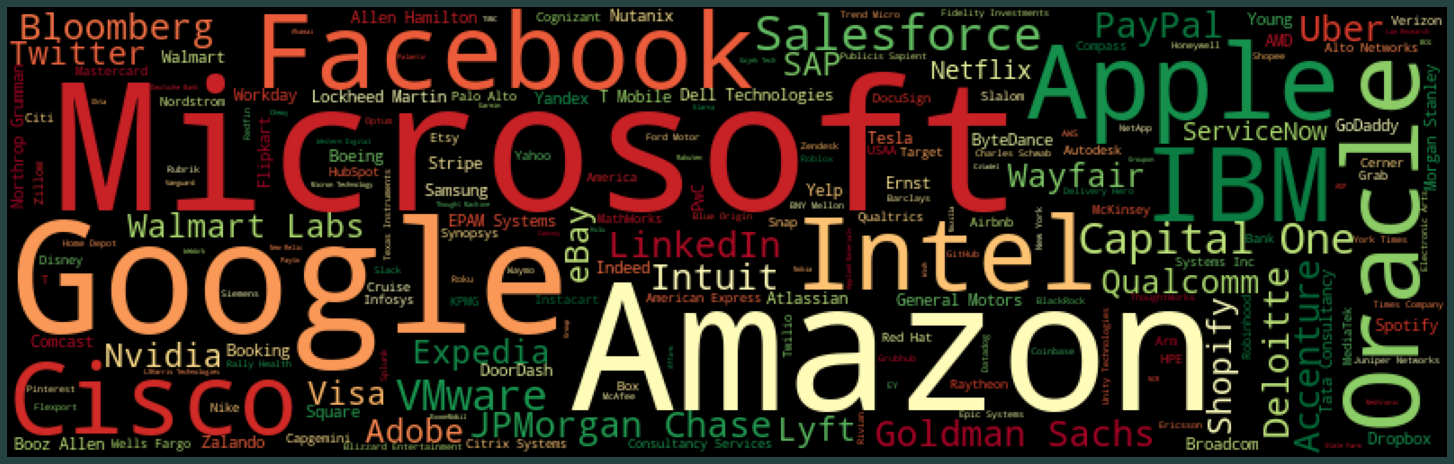

In [125]:
text = ",".join(company for company in df3["company"])
wordcloud = WordCloud(width = 800, height = 250, 
            background_color ="black",colormap="RdYlGn",max_font_size=100, stopwords =None,repeat= True).generate(text)
plt.figure(figsize = (20, 8),facecolor= "#254441") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0) 
plt.show()

In [126]:
print(f'\n There are {len(df3["title"].unique())} job title enlisted here.\n')
Job_Title = np.unique(df["title"])
Job_Title = pd.DataFrame(Job_Title , columns = ["title"])
Job_Title


 There are 15 job title enlisted here.



title
0               Business Analyst
1                 Data Scientist
2              Hardware Engineer
3                Human Resources
4          Management Consultant
5                      Marketing
6            Mechanical Engineer
7               Product Designer
8                Product Manager
9                      Recruiter
10                         Sales
11             Software Engineer
12  Software Engineering Manager
13            Solution Architect
14     Technical Program Manager

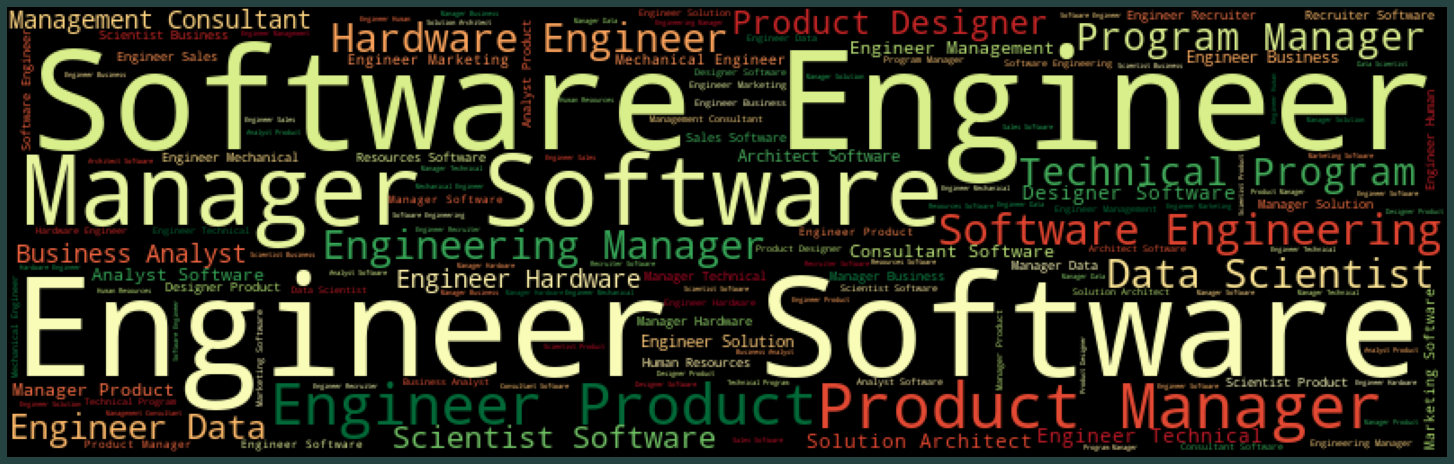

In [127]:
text = ",".join(Job_Title for Job_Title in df3["title"])
wordcloud = WordCloud(width = 800, height = 250, 
            background_color ="black",colormap="RdYlGn",max_font_size=100, stopwords =None,repeat= True).generate(text)
plt.figure(figsize = (20, 8),facecolor= "#254441") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0) 
plt.show()

In [128]:
print(f'\n There are {len(df3["location"].unique())} location enlisted here.\n')
location_area = np.unique(df3['location'])
location_area = pd.DataFrame(location_area, columns = ['location'])
location_area


 There are 768 location enlisted here.



location
0         Aachen, NW, Germany
1         Aarhus, AR, Denmark
2                Abingdon, MD
3            Accra, AA, Ghana
4                 Alameda, CA
..                        ...
763      Yorktown Heights, NY
764                 Yulee, FL
765       Zapopan, JA, Mexico
766   Zurich, ZH, Switzerland
767  hod hasharon, HM, Israel

[768 rows x 1 columns]

In [129]:
#df['A'].apply(lambda x: float(x))

In [130]:
df['company'][1:5]

23532    Microsoft
23533       Google
23534    Microsoft
23535        Blend
Name: company, dtype: object

In [131]:
#df["company"].str.replace("$", "",regex=False).str.replace(",", "").astype(float).head()

In [132]:
#df["title"].astype(float).head()

In [133]:
 #px.set_mapbox_access_token(open("token1.mapbox_token").read())

In [134]:
fig = px.scatter_mapbox(
    df3,  # Our DataFrame
    lat= "Latitude",
    lon= "Longitude",
    width=600,  # Width of map
    height=600,  # Height of map
    color="location",
    hover_data=["location"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [135]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df3,
    x="Latitude",
    y="Longitude",
    z="location",
    labels={"lon": "Longitude", "lat": "Latitude", "loc": "location"},
    width=600,
    height=500,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

In [136]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21521 entries, 0 to 21520
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                21521 non-null  object 
 1   company                  21521 non-null  object 
 2   level                    21521 non-null  object 
 3   title                    21521 non-null  object 
 4   totalyearlycompensation  21521 non-null  int64  
 5   location                 21521 non-null  object 
 6   yearsofexperience        21521 non-null  float64
 7   yearsatcompany           21521 non-null  float64
 8   tag                      21521 non-null  object 
 9   basesalary               21521 non-null  float64
 10  stockgrantvalue          21521 non-null  float64
 11  bonus                    21521 non-null  float64
 12  gender                   21521 non-null  object 
 13  otherdetails             21521 non-null  object 
 14  cityid                

In [137]:
print(f'\n There are {len(df3["tag"].unique())} tags enlisted here.\n')
Status = np.unique(df3['tag'])
Status = pd.DataFrame(Status , columns = ['tag'])
Status


 There are 1542 tags enlisted here.



tag
0                      #finance
1     2 Year Rotational Program
2                     3D Artist
3       3D Visual Merchandising
4                            5G
...                         ...
1537            tech consulting
1538                 tech sales
1539                 technology
1540             transportation
1541                   whatsapp

[1542 rows x 1 columns]

In [138]:
df5 = df3[["company", "yearsofexperience","totalyearlycompensation","yearsatcompany","basesalary"]]
df5.head()

company  yearsofexperience  totalyearlycompensation  yearsatcompany  \
0     Google                5.0                   400000             5.0   
1  Microsoft                3.0                   136000             2.0   
2     Google                6.0                   337000             6.0   
3  Microsoft                4.0                   222000             4.0   
4      Blend                5.0                   187000             0.0   

   basesalary  
0    210000.0  
1    124000.0  
2    177000.0  
3    164000.0  
4    165000.0

In [139]:
df5.isnull().sum()

company                    0
yearsofexperience          0
totalyearlycompensation    0
yearsatcompany             0
basesalary                 0
dtype: int64

In [140]:
df5.select_dtypes("object").head()

company
0     Google
1  Microsoft
2     Google
3  Microsoft
4      Blend

In [141]:
df5.select_dtypes("object").nunique()

company    1244
dtype: int64

In [142]:
sorted(df5.columns)

['basesalary',
 'company',
 'totalyearlycompensation',
 'yearsatcompany',
 'yearsofexperience']

In [143]:
df5.select_dtypes("number").head()

yearsofexperience  totalyearlycompensation  yearsatcompany  basesalary
0                5.0                   400000             5.0    210000.0
1                3.0                   136000             2.0    124000.0
2                6.0                   337000             6.0    177000.0
3                4.0                   222000             4.0    164000.0
4                5.0                   187000             0.0    165000.0

In [144]:
df5.select_dtypes("number").corr()

yearsofexperience  totalyearlycompensation  \
yearsofexperience                 1.000000                 0.402809   
totalyearlycompensation           0.402809                 1.000000   
yearsatcompany                    0.537457                 0.167440   
basesalary                        0.421357                 0.784558   

                         yearsatcompany  basesalary  
yearsofexperience              0.537457    0.421357  
totalyearlycompensation        0.167440    0.784558  
yearsatcompany                 1.000000    0.182941  
basesalary                     0.182941    1.000000

In [164]:
features = ["company"]
X = df[features]
print(X.shape)
X.head()

(21521, 1)


company
15710     Google
23532  Microsoft
23533     Google
23534  Microsoft
23535      Blend

In [165]:
assert X.shape == (21521, 1), f"`X_train` is the wrong size: {X_train.shape}."

In [166]:
target = "basesalary"
y = df[target]
print(y.shape)
y.head()

(21521,)


15710    210000.0
23532    124000.0
23533    177000.0
23534    164000.0
23535    165000.0
Name: basesalary, dtype: float64

In [167]:
assert y.shape == (21521,), f"`y_train` is the wrong size: {y.shape}."

In [168]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (17216, 1)
y_train shape: (17216,)
X_test shape: (4305, 1)
y_test shape: (4305,)


In [169]:
y_train.value_counts(normalize = True).max()

0.0391496282527881

In [170]:
acc_baseline = y_train.value_counts(normalize = True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.04


In [171]:
# Build model
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=1000)
)
# Fit model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['company'], use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [173]:
# Check your work
check_is_fitted(model[-1])

In [174]:
accuracy_score(y_train, model.predict(X_train))

0.11181459107806692

In [175]:
model.score(X_test, y_test)

0.04715447154471545

In [176]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.11
Test Accuracy: 0.05


# Communicate

In [177]:
model.predict(X_train)[:5]

array([150000., 160000.,  70000., 111000., 150000.])

In [178]:
y_train_pred_proba = model.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[5.93515123e-05 1.13362453e-04 5.95283364e-05 ... 5.90514180e-05
  5.90514180e-05 5.90514180e-05]
 [3.32023553e-05 6.30164827e-05 3.33005980e-05 ... 3.30356183e-05
  3.30356183e-05 3.30356183e-05]
 [6.18472491e-05 1.25094427e-04 6.20418449e-05 ... 6.15171003e-05
  6.15171003e-05 6.15171003e-05]
 [5.50074122e-05 1.04346252e-04 5.51700768e-05 ... 5.47313377e-05
  5.47313377e-05 5.47313377e-05]
 [6.62158713e-05 1.31910624e-04 6.64214668e-05 ... 6.58670312e-05
  6.58670312e-05 6.58670312e-05]]


In [179]:
features = model.named_steps["onehotencoder"].get_feature_names()
importances = model.named_steps["logisticregression"].coef_[0]

In [180]:
odds_ratios = pd.Series(np.exp(importances), index=features).sort_values()
odds_ratios.head()

company_Microsoft    0.932695
company_Amazon       0.933426
company_Google       0.940574
company_Facebook     0.958772
company_Apple        0.977479
dtype: float64

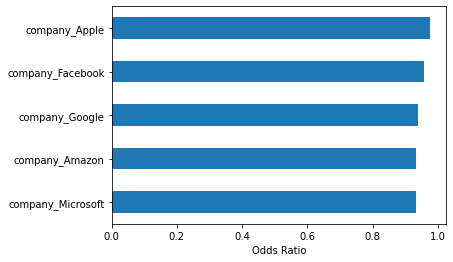

In [184]:
# Horizontal bar chart, five largest coefficients
odds_ratios.head().plot(kind = "barh")
plt.xlabel("Odds Ratio");

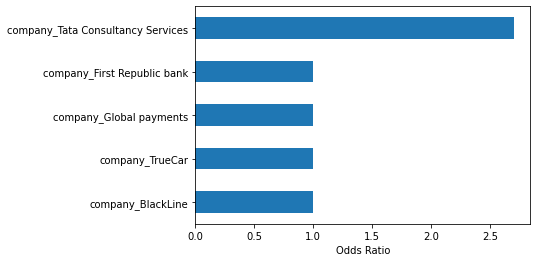

In [185]:
# Horizontal bar chart, five largest coefficients
odds_ratios.tail().plot(kind = "barh")
plt.xlabel("Odds Ratio");